In [1]:
import keras

Using TensorFlow backend.


In [2]:
from keras import models
from keras import layers
import numpy as np
old = np.load
np.load = lambda *a,**k: old(*a,**k,allow_pickle=True)

from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

np.load = old
del(old)

In [15]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [17]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [18]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [19]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [0]:
a = np.zeros((len(train_data),10000))

for i, u in enumerate(train_data):
    a[i, u] = 1.
    
  # bina function banae whi kaam kia! abi srf train data pe kia hy, test data pe b aesy hi hoga!

In [25]:
y_train = train_labels.astype('float32')
y_test = test_labels.astype('float32')

y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [0]:
from keras import layers, models

In [27]:
my_model = models.Sequential()
my_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
my_model.add(layers.Dense(16, activation='relu'))
my_model.add(layers.Dense(1, activation='sigmoid'))

W0707 13:09:31.776415 139730835896192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0707 13:09:31.832354 139730835896192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0707 13:09:31.849891 139730835896192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [28]:
from keras import optimizers, losses, metrics
my_model.compile(loss='binary_crossentropy',
                optimizer='RMSprop',
                metrics=['accuracy'])

W0707 13:26:35.143373 139730835896192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0707 13:26:35.172388 139730835896192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0707 13:26:35.180338 139730835896192 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
x_data=x_train[:1000]
partial_x_data = x_train[1000:]

y_labels = y_train[:1000]
partial_y_labels = y_train[1000:]

In [30]:
training = my_model.fit(partial_x_data,
                        partial_y_labels,
                        epochs = 20,
                        batch_size = 512,
                        validation_data=(x_data,y_labels))

W0707 13:27:20.195890 139730835896192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 24000 samples, validate on 1000 samples
Epoch 1/20
24000/24000 [==============================] - 4s 185us/step - loss: 0.4486 - acc: 0.8226 - val_loss: 0.3197 - val_acc: 0.8780
Epoch 2/20
24000/24000 [==============================] - 3s 117us/step - loss: 0.2598 - acc: 0.9086 - val_loss: 0.2610 - val_acc: 0.8880
Epoch 3/20
24000/24000 [==============================] - 3s 114us/step - loss: 0.1997 - acc: 0.9301 - val_loss: 0.2500 - val_acc: 0.8900
Epoch 4/20
24000/24000 [==============================] - 3s 113us/step - loss: 0.1671 - acc: 0.9412 - val_loss: 0.2551 - val_acc: 0.8920
Epoch 5/20
24000/24000 [==============================] - 3s 117us/step - loss: 0.1421 - acc: 0.9503 - val_loss: 0.2644 - val_acc: 0.8900
Epoch 6/20
24000/24000 [==============================] - 3s 113us/step - loss: 0.1216 - acc: 0.9584 - val_loss: 0.2802 - val_acc: 0.8930
Epoch 7/20
24000/24000 [==============================] - 3s 114us/step - loss: 0.1047 - acc: 0.9646 - val_loss: 0.3107 - v

In [33]:
history_dictionary = training.history
history_dictionary.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [47]:
a = history_dictionary['val_loss']
np.argmin(history_dictionary['val_acc'])

a[18]

0.6711619033813476

In [0]:
import matplotlib.pyplot as plt

In [0]:
loss_values = history_dictionary['loss']

In [0]:
accuracy = history_dictionary['acc']

In [0]:
validation_loss_values = history_dictionary['val_loss']

In [0]:
validation_accuracy = history_dictionary['val_acc']

In [0]:
epochs = range(1, len(history_dictionary['val_acc'])+1)

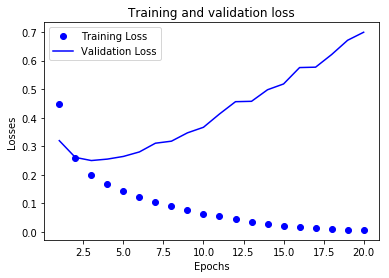

In [51]:
plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, validation_loss_values, 'b', label='Validation Loss')
#plt.plot(epochs, validation_accuracy, 'c', label='Validation Acc')
plt.title('Training and validation loss')
plt.ylabel("Losses")
plt.xlabel('Epochs')
plt.legend()
plt.show()

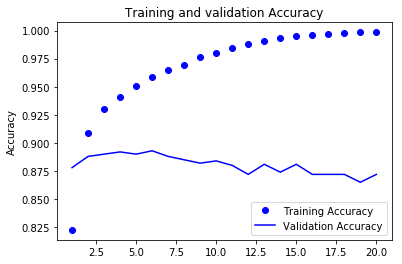

In [52]:
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.ylabel("Accuracy")
#plt.xlabel('Epochs')
plt.legend()
plt.show()

# Retraining model from scratch by making amendments

In [0]:
my_model2 = models.Sequential()
my_model2.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
my_model2.add(layers.Dense(16, activation='relu'))
my_model2.add(layers.Dense(1, activation='sigmoid'))

In [0]:
my_model2.compile(loss='binary_crossentropy',
                optimizer='RMSprop',
                metrics=['accuracy'])

In [59]:
training2 = my_model2.fit(partial_x_data,
                        partial_y_labels,
                        epochs = 4,
                        batch_size = 512,
                        validation_data=(x_data,y_labels))

Train on 24000 samples, validate on 1000 samples
Epoch 1/4
24000/24000 [==============================] - 3s 113us/step - loss: 0.0766 - acc: 0.9751 - val_loss: 0.3931 - val_acc: 0.8850
Epoch 2/4
24000/24000 [==============================] - 3s 114us/step - loss: 0.0658 - acc: 0.9788 - val_loss: 0.4039 - val_acc: 0.8800
Epoch 3/4
24000/24000 [==============================] - 3s 113us/step - loss: 0.0614 - acc: 0.9803 - val_loss: 0.4405 - val_acc: 0.8740
Epoch 4/4
24000/24000 [==============================] - 3s 112us/step - loss: 0.0528 - acc: 0.9832 - val_loss: 0.4563 - val_acc: 0.8750


In [60]:
test = my_model2.evaluate(x_test,y_test)

25000/25000 [==============================] - 2s 77us/step


In [63]:
test

[0.5529531294345855, 0.85516]

In [64]:
my_model2.predict(x_test)

array([[0.03490871],
       [0.9999999 ],
       [0.19054702],
       ...,
       [0.0631392 ],
       [0.00971305],
       [0.7517315 ]], dtype=float32)

# Further experiments

#  Model with one layer

In [0]:
my_model3 = models.Sequential()
my_model3.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
my_model3.add(layers.Dense(1, activation='sigmoid'))

In [0]:
my_model3.compile(loss='binary_crossentropy',
                optimizer='RMSprop',
                metrics=['accuracy'])

In [85]:
training3 = my_model3.fit(partial_x_data,
                        partial_y_labels,
                        epochs = 6,
                        batch_size = 512,
                        validation_data=(x_data,y_labels))

Train on 24000 samples, validate on 1000 samples
Epoch 1/6
24000/24000 [==============================] - 3s 141us/step - loss: 0.4432 - acc: 0.8292 - val_loss: 0.3300 - val_acc: 0.8820
Epoch 2/6
24000/24000 [==============================] - 3s 116us/step - loss: 0.2757 - acc: 0.9075 - val_loss: 0.2710 - val_acc: 0.8890
Epoch 3/6
24000/24000 [==============================] - 3s 116us/step - loss: 0.2189 - acc: 0.9235 - val_loss: 0.2565 - val_acc: 0.8920
Epoch 4/6
24000/24000 [==============================] - 3s 117us/step - loss: 0.1873 - acc: 0.9354 - val_loss: 0.2568 - val_acc: 0.8860
Epoch 5/6
24000/24000 [==============================] - 3s 116us/step - loss: 0.1645 - acc: 0.9451 - val_loss: 0.2480 - val_acc: 0.8870
Epoch 6/6
24000/24000 [==============================] - 3s 116us/step - loss: 0.1466 - acc: 0.9523 - val_loss: 0.2611 - val_acc: 0.8900


In [86]:
test3 = my_model3.evaluate(x_test,y_test)

25000/25000 [==============================] - 2s 85us/step


In [87]:
test3

[0.30548579089164735, 0.87816]

# Model with three layers

In [0]:
my_model4 = models.Sequential()
my_model4.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
my_model4.add(layers.Dense(16, activation='relu'))
my_model4.add(layers.Dense(16, activation='relu'))
my_model4.add(layers.Dense(1, activation='sigmoid'))

In [0]:
my_model4.compile(loss='binary_crossentropy',
                optimizer='RMSprop',
                metrics=['accuracy'])

In [90]:
training4 = my_model4.fit(partial_x_data,
                        partial_y_labels,
                        epochs = 5,
                        batch_size = 512,
                        validation_data=(x_data,y_labels))

Train on 24000 samples, validate on 1000 samples
Epoch 1/5
24000/24000 [==============================] - 3s 144us/step - loss: 0.4603 - acc: 0.8096 - val_loss: 0.3138 - val_acc: 0.8720
Epoch 2/5
24000/24000 [==============================] - 3s 114us/step - loss: 0.2545 - acc: 0.9083 - val_loss: 0.3235 - val_acc: 0.8780
Epoch 3/5
24000/24000 [==============================] - 3s 118us/step - loss: 0.1932 - acc: 0.9300 - val_loss: 0.2594 - val_acc: 0.8880
Epoch 4/5
24000/24000 [==============================] - 3s 115us/step - loss: 0.1613 - acc: 0.9411 - val_loss: 0.2668 - val_acc: 0.8890
Epoch 5/5
24000/24000 [==============================] - 3s 114us/step - loss: 0.1370 - acc: 0.9505 - val_loss: 0.2851 - val_acc: 0.8860


In [91]:
test4 = my_model4.evaluate(x_test,y_test)

25000/25000 [==============================] - 2s 85us/step


In [92]:
test4

[0.33016703439712525, 0.87848]

# Model with 32 units

In [0]:
my_model5 = models.Sequential()
my_model5.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
my_model5.add(layers.Dense(32, activation='relu'))
my_model5.add(layers.Dense(1, activation='sigmoid'))

In [0]:
my_model5.compile(loss='binary_crossentropy',
                optimizer='RMSprop',
                metrics=['accuracy'])

In [98]:
training5 = my_model5.fit(partial_x_data,
                        partial_y_labels,
                        epochs = 10,
                        batch_size = 512,
                        validation_data=(x_data,y_labels))

Train on 24000 samples, validate on 1000 samples
Epoch 1/10
24000/24000 [==============================] - 4s 153us/step - loss: 0.4341 - acc: 0.8178 - val_loss: 0.3218 - val_acc: 0.8740
Epoch 2/10
24000/24000 [==============================] - 3s 124us/step - loss: 0.2440 - acc: 0.9122 - val_loss: 0.2536 - val_acc: 0.8850
Epoch 3/10
24000/24000 [==============================] - 3s 126us/step - loss: 0.1888 - acc: 0.9306 - val_loss: 0.2549 - val_acc: 0.8920
Epoch 4/10
24000/24000 [==============================] - 3s 125us/step - loss: 0.1596 - acc: 0.9419 - val_loss: 0.2680 - val_acc: 0.8920
Epoch 5/10
24000/24000 [==============================] - 3s 125us/step - loss: 0.1293 - acc: 0.9550 - val_loss: 0.3143 - val_acc: 0.8790
Epoch 6/10
24000/24000 [==============================] - 3s 124us/step - loss: 0.1126 - acc: 0.9606 - val_loss: 0.3089 - val_acc: 0.8850
Epoch 7/10
24000/24000 [==============================] - 3s 126us/step - loss: 0.0905 - acc: 0.9707 - val_loss: 0.3311 - v

In [0]:
results = training5.history

In [131]:
a = results['val_acc']
print(np.argmax(a))
b = np.max(results['val_acc'])
b

2


0.892

In [132]:
aa = results['val_acc']
print(np.argmin(aa))
bb = np.min(results['val_acc'])
bb

0


0.8740000047683716

# Model with 64 units

In [0]:
my_model6 = models.Sequential()
my_model6.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
my_model6.add(layers.Dense(64, activation='relu'))
my_model6.add(layers.Dense(1, activation='sigmoid'))

In [0]:
my_model6.compile(loss='binary_crossentropy',
                optimizer='RMSprop',
                metrics=['accuracy'])

In [137]:
training6 = my_model6.fit(partial_x_data,
                        partial_y_labels,
                        epochs = 10,
                        batch_size = 512,
                        validation_data=(x_data,y_labels))

Train on 24000 samples, validate on 1000 samples
Epoch 1/10
24000/24000 [==============================] - 4s 147us/step - loss: 0.0690 - acc: 0.9773 - val_loss: 0.3445 - val_acc: 0.8860
Epoch 2/10
24000/24000 [==============================] - 3s 144us/step - loss: 0.0520 - acc: 0.9838 - val_loss: 0.3939 - val_acc: 0.8880
Epoch 3/10
24000/24000 [==============================] - 3s 145us/step - loss: 0.0352 - acc: 0.9900 - val_loss: 0.5866 - val_acc: 0.8670
Epoch 4/10
24000/24000 [==============================] - 3s 146us/step - loss: 0.0330 - acc: 0.9894 - val_loss: 0.4458 - val_acc: 0.8810
Epoch 5/10
24000/24000 [==============================] - 3s 143us/step - loss: 0.0253 - acc: 0.9933 - val_loss: 0.4792 - val_acc: 0.8890
Epoch 6/10
24000/24000 [==============================] - 3s 144us/step - loss: 0.0048 - acc: 0.9995 - val_loss: 0.6076 - val_acc: 0.8680
Epoch 7/10
24000/24000 [==============================] - 3s 146us/step - loss: 0.0182 - acc: 0.9944 - val_loss: 0.5795 - v

In [0]:
results6 = training6.history

In [143]:
a = results6['val_acc']
print(np.argmax(a))
b = np.max(results6['val_acc'])
b

4


0.8889999952316284

In [145]:
aa = results6['val_acc']
print(np.argmin(aa))
bb = np.min(results6['val_acc'])
bb

2


0.8670000095367432

# Model with MSE loss function

In [0]:
my_model7 = models.Sequential()
my_model7.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
my_model7.add(layers.Dense(16, activation='relu'))
my_model7.add(layers.Dense(1, activation='sigmoid'))

In [0]:
my_model7.compile(loss='mse',
                optimizer='RMSprop',
                metrics=['accuracy'])

In [148]:
training7 = my_model7.fit(partial_x_data,
                        partial_y_labels,
                        epochs = 5,
                        batch_size = 512,
                        validation_data=(x_data,y_labels))

Train on 24000 samples, validate on 1000 samples
Epoch 1/5
24000/24000 [==============================] - 3s 140us/step - loss: 0.1487 - acc: 0.8174 - val_loss: 0.0998 - val_acc: 0.8780
Epoch 2/5
24000/24000 [==============================] - 3s 108us/step - loss: 0.0783 - acc: 0.9088 - val_loss: 0.0802 - val_acc: 0.8890
Epoch 3/5
24000/24000 [==============================] - 3s 106us/step - loss: 0.0587 - acc: 0.9304 - val_loss: 0.0779 - val_acc: 0.8940
Epoch 4/5
24000/24000 [==============================] - 3s 108us/step - loss: 0.0486 - acc: 0.9424 - val_loss: 0.0797 - val_acc: 0.8890
Epoch 5/5
24000/24000 [==============================] - 3s 107us/step - loss: 0.0412 - acc: 0.9526 - val_loss: 0.0828 - val_acc: 0.8820


In [0]:
results7 = training7.history

In [154]:
a = results7['val_acc']
print(np.argmax(a))
b = np.max(results7['val_acc'])
b

2


0.8940000085830688

# Model with "tanh" activation function

In [0]:
my_model8 = models.Sequential()
my_model8.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
my_model8.add(layers.Dense(64, activation='tanh'))
my_model8.add(layers.Dense(1, activation='sigmoid'))

In [0]:
my_model8.compile(loss='binary_crossentropy',
                optimizer='RMSprop',
                metrics=['accuracy'])

In [160]:
training8 = my_model6.fit(partial_x_data,
                        partial_y_labels,
                        epochs = 10,
                        batch_size = 512,
                        validation_data=(x_data,y_labels))

Train on 24000 samples, validate on 1000 samples
Epoch 1/10
24000/24000 [==============================] - 4s 167us/step - loss: 6.9848e-05 - acc: 1.0000 - val_loss: 0.8347 - val_acc: 0.8800
Epoch 2/10
24000/24000 [==============================] - 3s 145us/step - loss: 3.8234e-05 - acc: 1.0000 - val_loss: 0.8719 - val_acc: 0.8820
Epoch 3/10
24000/24000 [==============================] - 3s 144us/step - loss: 0.0249 - acc: 0.9959 - val_loss: 0.8862 - val_acc: 0.8840
Epoch 4/10
24000/24000 [==============================] - 3s 145us/step - loss: 1.9090e-05 - acc: 1.0000 - val_loss: 0.9029 - val_acc: 0.8860
Epoch 5/10
24000/24000 [==============================] - 3s 145us/step - loss: 1.3259e-05 - acc: 1.0000 - val_loss: 0.9295 - val_acc: 0.8830
Epoch 6/10
24000/24000 [==============================] - 3s 144us/step - loss: 8.4972e-06 - acc: 1.0000 - val_loss: 0.9795 - val_acc: 0.8820
Epoch 7/10
24000/24000 [==============================] - 3s 144us/step - loss: 0.0197 - acc: 0.9967 - 

In [0]:
results8 = training8.history

In [162]:
a = results8['val_acc']
print(np.argmax(a))
b = np.max(results8['val_acc'])
b

3


0.8859999976158142